# Sangamesh
## PJMW_MW- Energy consumption-Project-Random forest Model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_excel("PJMW_MW_Hourly.xlsx") 

In [5]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

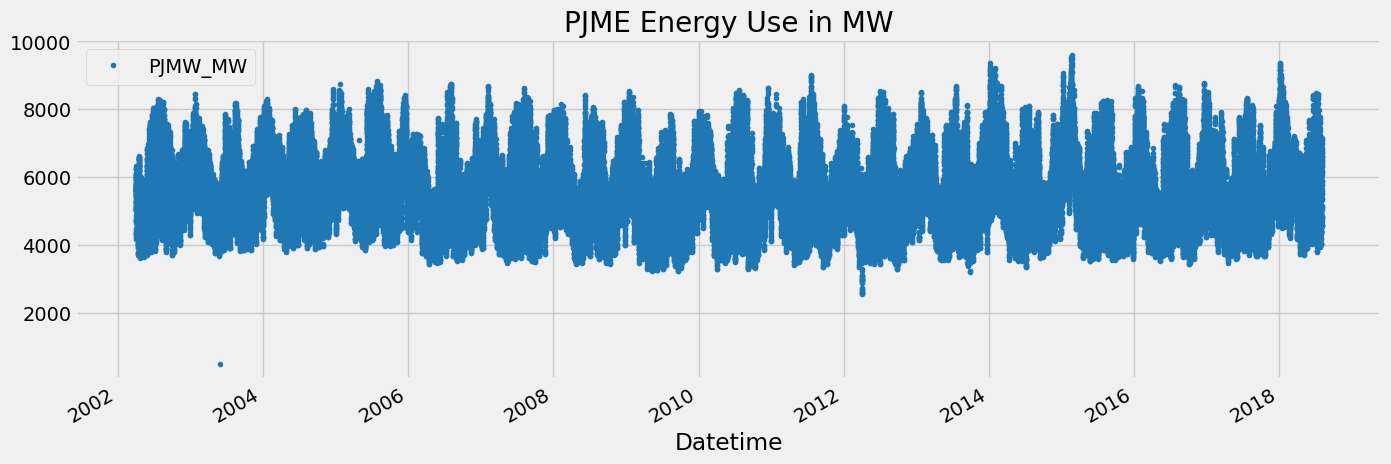

In [6]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

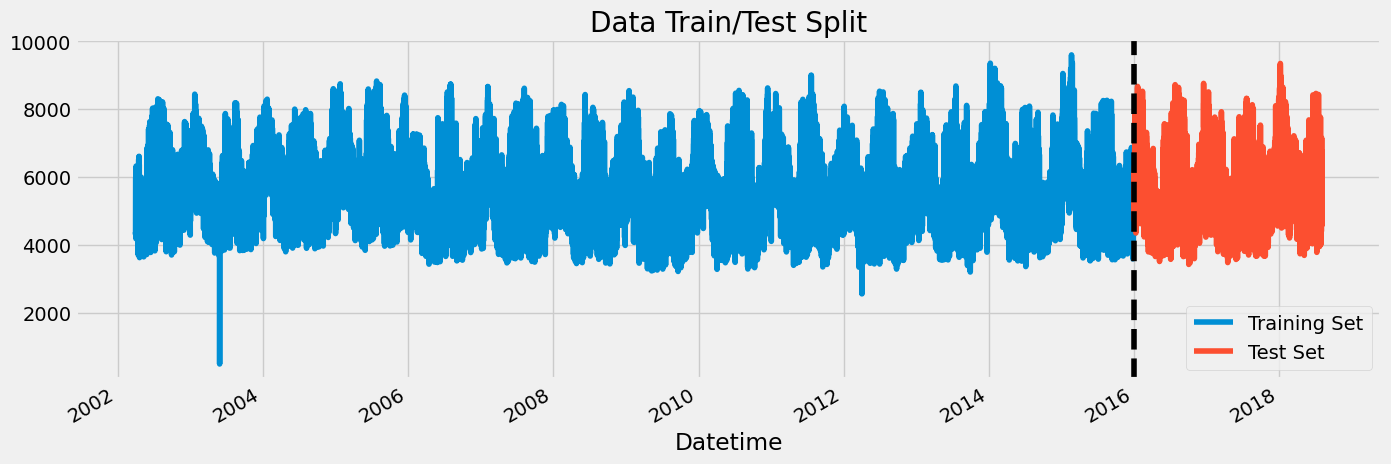

In [7]:
train = df.loc[df.index < '01-01-2016']
test = df.loc[df.index >= '01-01-2016']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2016', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

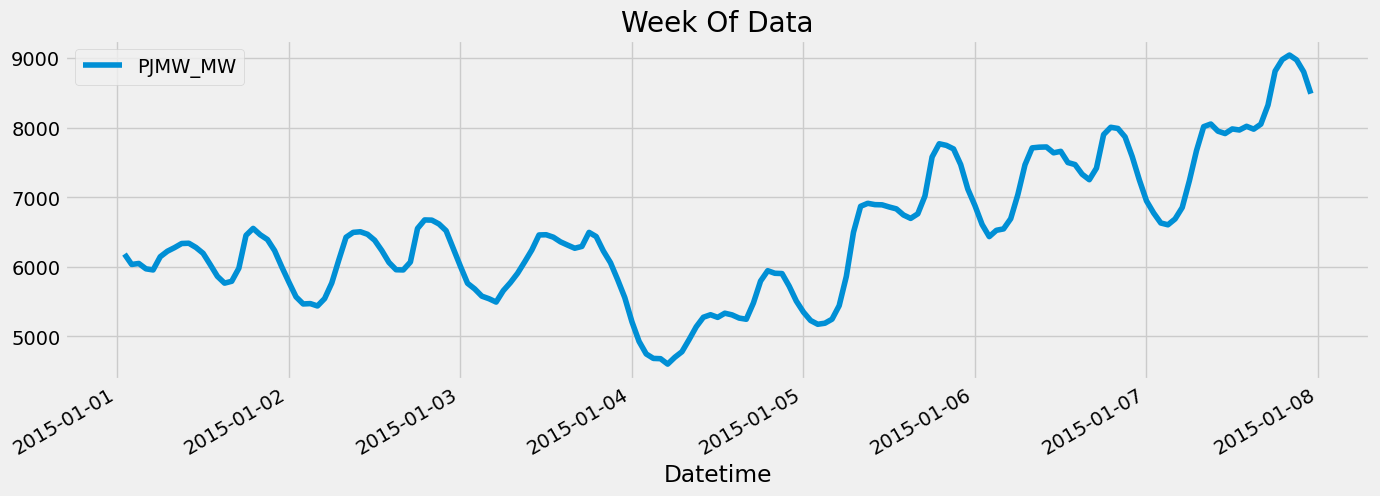

In [8]:
df.loc[(df.index > '01-01-2015') & (df.index < '01-08-2015')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [9]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

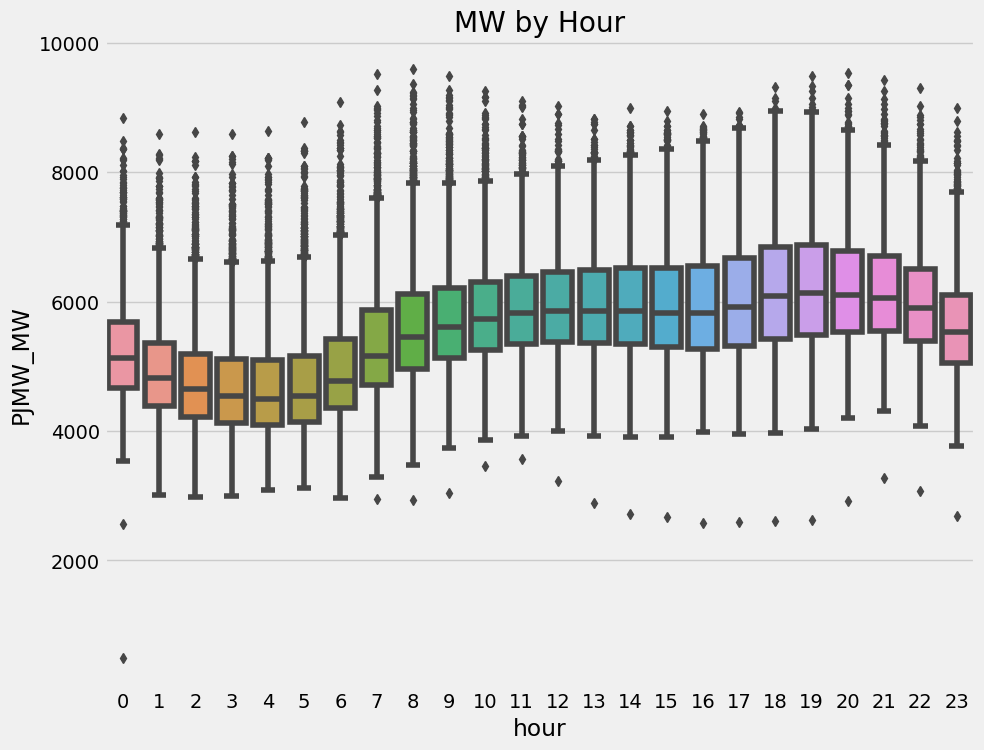

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJMW_MW')
ax.set_title('MW by Hour')
plt.show()

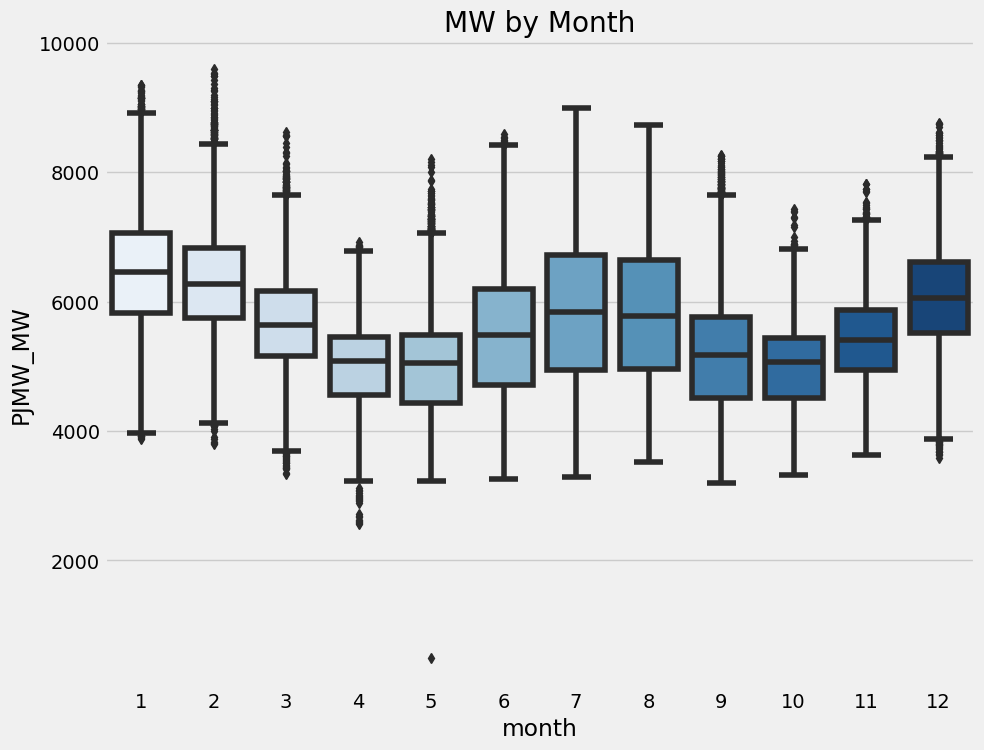

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJMW_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

In [12]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']

TARGET = 'PJMW_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [13]:
 model = RandomForestRegressor(n_estimators=100, random_state=42)
    

In [14]:
 model.fit(X_train, y_train)
    

RandomForestRegressor(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 754422.1951747428


In [17]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Mean Squared Error:', mse)

Mean Squared Error: 868.5748068961838


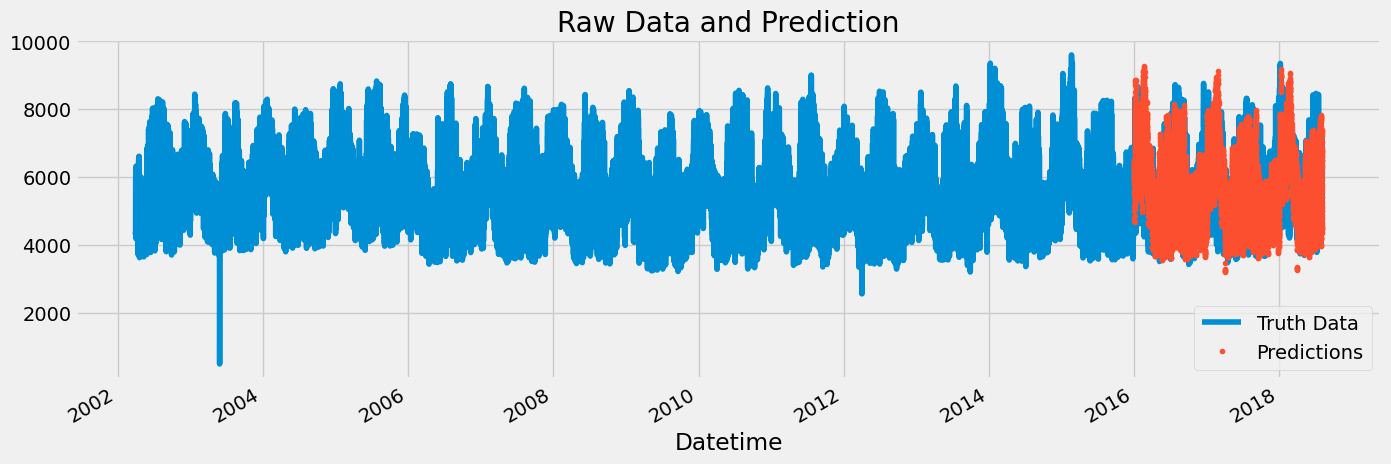

In [18]:
test['y_pred'] = model.predict(X_test)
df = df.merge(test[['y_pred']], how='left', left_index=True, right_index=True)
ax = df[['PJMW_MW']].plot(figsize=(15, 5))
df['y_pred'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [19]:
import pickle

In [20]:
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()